In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
test_10 = np.array([0] + torch.load("trainingInfo/10_acc_test.pt")[:-1]) / 100.
test_20 = np.array([0] + torch.load("trainingInfo/20_acc_test.pt")[:-1]) / 100.
test_30 = np.array([0] + torch.load("trainingInfo/30_acc_test.pt")[:-1]) / 100.
test_40 = np.array([0] + torch.load("trainingInfo/40_acc_test.pt")[:-1]) / 100.
test_clean = np.array([0] + torch.load("trainingInfo/clean_acc_test.pt")[:-1]) / 100.
x = range(0,10)

In [3]:
train_10 = np.array([0] + torch.load("trainingInfo/10_acc_train.pt")[:-1]) / 100.
train_20 = np.array([0] + torch.load("trainingInfo/20_acc_train.pt")[:-1]) / 100.
train_30 = np.array([0] + torch.load("trainingInfo/30_acc_train.pt")[:-1]) / 100.
train_40 = np.array([0] + torch.load("trainingInfo/40_acc_train.pt")[:-1]) / 100.
train_clean = np.array([0] + torch.load("trainingInfo/clean_acc_train.pt")[:-1]) / 100.

In [4]:
test_10l = torch.load("trainingInfo/10_loss_test.pt")
test_20l = torch.load("trainingInfo/20_loss_test.pt")
test_30l = torch.load("trainingInfo/30_loss_test.pt")
test_40l = torch.load("trainingInfo/40_loss_test.pt")
test_cleanl = torch.load("trainingInfo/clean_loss_test.pt")

In [5]:
train_10l = torch.load("trainingInfo/10_loss_train.pt")
train_20l = torch.load("trainingInfo/20_loss_train.pt")
train_30l = torch.load("trainingInfo/30_loss_train.pt")
train_40l = torch.load("trainingInfo/40_loss_train.pt")
train_cleanl = torch.load("trainingInfo/clean_loss_train.pt")

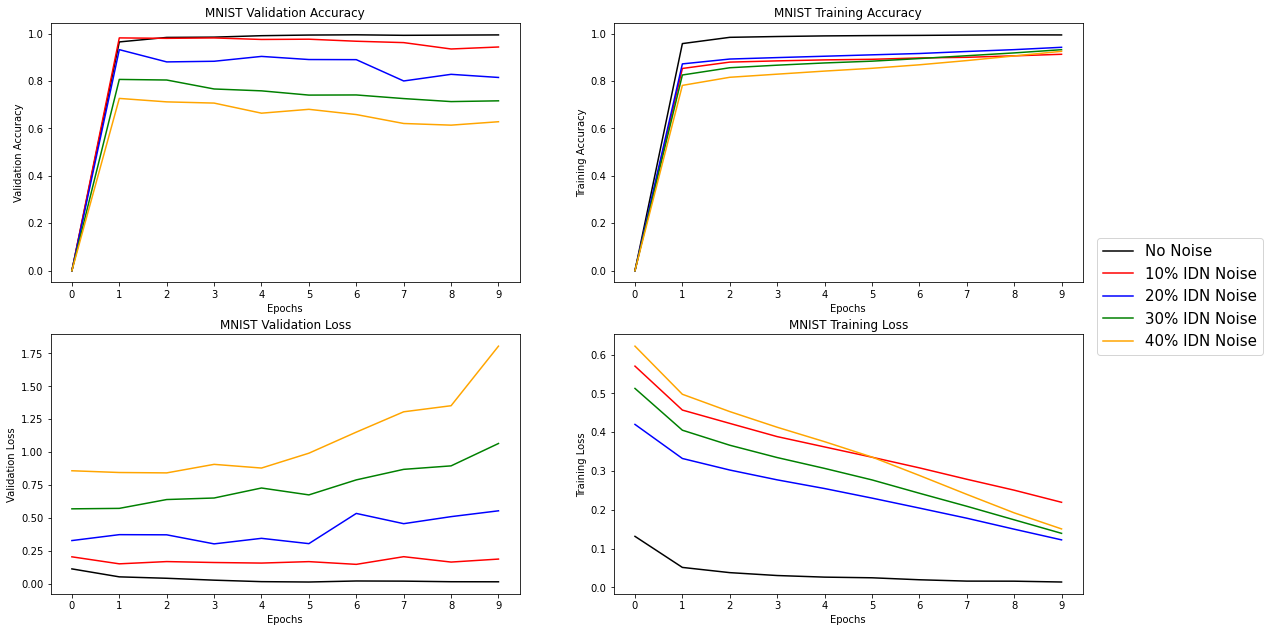

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x, test_clean, linestyle='-', color='black', label='No Noise')
ax1.plot(x, test_10, linestyle='-', color='red', label='10% IDN Noise')
ax1.plot(x, test_20, linestyle='-', color='blue', label='20% IDN Noise')
ax1.plot(x, test_30, linestyle='-', color='green', label='30% IDN Noise')
ax1.plot(x, test_40, linestyle='-', color='orange', label='40% IDN Noise')
ax1.set_xticks(x)
ax1.set_title("MNIST Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation Accuracy")

ax2.plot(x, train_clean, linestyle='-', color='black', label='No Noise')
ax2.plot(x, train_10, linestyle='-', color='red', label='10% IDN Noise')
ax2.plot(x, train_20, linestyle='-', color='blue', label='20% IDN Noise')
ax2.plot(x, train_30, linestyle='-', color='green', label='30% IDN Noise')
ax2.plot(x, train_40, linestyle='-', color='orange', label='40% IDN Noise')
ax2.set_xticks(x)
ax2.set_title("MNIST Training Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training Accuracy")

ax3.plot(x, test_cleanl, linestyle='-', color='black', label='No Noise')
ax3.plot(x, test_10l, linestyle='-', color='red', label='10% IDN Noise')
ax3.plot(x, test_20l, linestyle='-', color='blue', label='20% IDN Noise')
ax3.plot(x, test_30l, linestyle='-', color='green', label='30% IDN Noise')
ax3.plot(x, test_40l, linestyle='-', color='orange', label='40% IDN Noise')
ax3.set_xticks(x)
ax3.set_title("MNIST Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Validation Loss")

ax4.plot(x, train_cleanl, linestyle='-', color='black', label='No Noise')
ax4.plot(x, train_10l, linestyle='-', color='red', label='10% IDN Noise')
ax4.plot(x, train_20l, linestyle='-', color='blue', label='20% IDN Noise')
ax4.plot(x, train_30l, linestyle='-', color='green', label='30% IDN Noise')
ax4.plot(x, train_40l, linestyle='-', color='orange', label='40% IDN Noise')
ax4.set_xticks(x)
ax4.set_title("MNIST Training Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Training Loss")

ax2.legend(bbox_to_anchor=(1.4, 0.2), fontsize="15")
fig.set_size_inches(18.5, 10.5)
plt.show()

In [11]:
import seaborn as sns

In [12]:
pd.DataFrame({"10% IDN Noise":test_10,
              "20% IDN Noise":test_20,
              "30% IDN Noise":test_30,
              "40% IDN Noise":test_40})

,10% IDN Noise,20% IDN Noise,30% IDN Noise,40% IDN Noise
0,0.0000,0.0000,0.0000,0.0000
1,0.9706,0.9324,0.8068,0.7267
2,0.9850,0.8807,0.8043,0.7121
3,0.9738,0.8834,0.7665,0.7070
4,0.9784,0.9039,0.7586,0.6644
5,0.9715,0.8907,0.7407,0.6807
6,0.9694,0.8902,0.7413,0.6586
7,0.9663,0.8003,0.7260,0.6209
8,0.9212,0.8283,0.7133,0.6139
9,0.9439,0.8151,0.7165,0.6283


In [19]:
test1 = torch.load("lossData/20_acc1_resnet.pt")
test2 = torch.load("lossData/20_acc2_resnet.pt")
test3 = torch.load("lossData/20_acc3_resnet.pt")

In [20]:
testclean = torch.load("lossData/clean_acc_resnet.pt")

In [21]:
np.max(test1), np.max(test2), np.max(test3)

(92.35, 91.8, 95.08)

In [22]:
np.max(testclean)

99.28

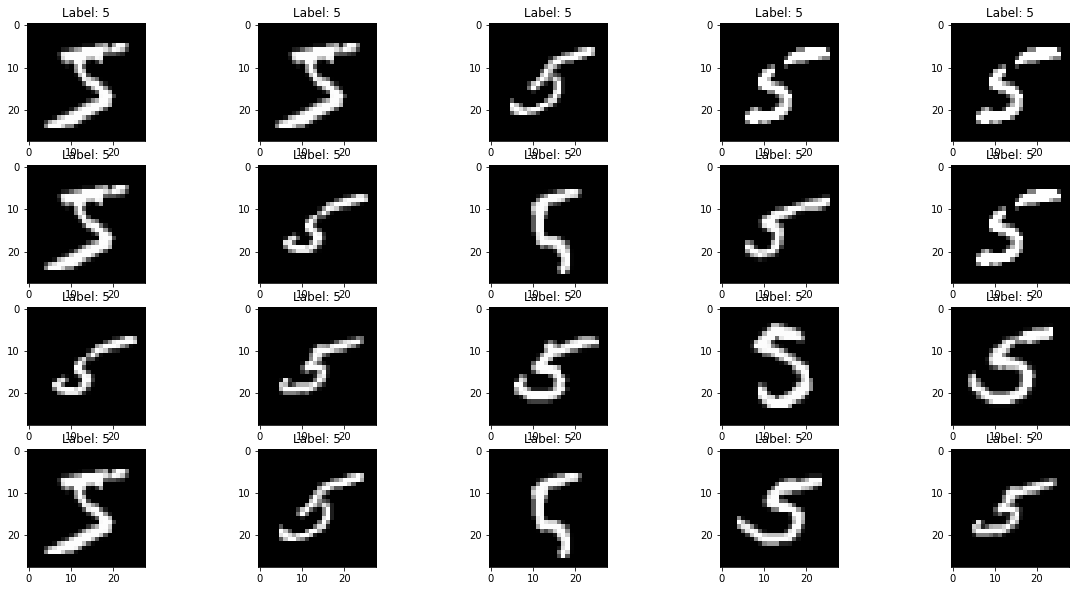

In [47]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='MNIST', train=True, download=False, transform=transform)

# Get the indices of images that contain the number 5
idx_5 = torch.where(train_dataset.targets == 5)[0]
np.random.shuffle(idx_5)

# Display multiple images that contain the number 5
fig, axs = plt.subplots(4, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_dataset[idx_5[i]][0].squeeze().numpy(), cmap='gray')
    ax.set_title("Label: 5")
plt.show()